In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## TASK : Price Elasticity Model Development
Prepare Data for Modeling:
Extract relevant features (e.g., price, attendance) and handle any necessary transformations.


Build the Model:
Use regression techniques to build a price elasticity model, such as using StatsModels or scikit-learn for regression analysis.


Validate the Model:
Assess model performance using metrics like R-squared, Mean Squared Error (MSE), and by checking residual plots.



In [5]:
final_df = pd.read_csv(r"C:\\Users\\Asus\\Downloads\\Monu_final_df.csv", index_col=['Unnamed: 0'])

In [6]:
final_df.head()

,ActivitySiteID,BookingEndDateTime (Month / Day / Year),Number Booked,Price (INR),BookingEndDateTime
0,1,2018-04-08,12,499.0,2018-04-08
1,1,2018-04-15,15,499.0,2018-04-15
2,1,2018-04-22,14,499.0,2018-04-22
3,1,2018-04-29,9,499.0,2018-04-29
4,1,2018-05-06,7,499.0,2018-05-06


In [9]:
final_df.isnull().sum()

ActivitySiteID                              0
BookingEndDateTime (Month / Day / Year)     0
Number Booked                               0
Price (INR)                                18
BookingEndDateTime                          0
dtype: int64

In [13]:
final_df= final_df.dropna()

In [14]:
# Add a constant term for the intercept
X = sm.add_constant(final_df['Price (INR)'])
y = final_df['Number Booked']

# Build the regression model
model = sm.OLS(y, X).fit()

# Get the model summary
model_summary = model.summary()

# Predict the values
y_pred = model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Display model summary and MSE
model_summary, mse


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          Number Booked   R-squared:                       0.039
 Model:                            OLS   Adj. R-squared:                  0.038
 Method:                 Least Squares   F-statistic:                     130.5
 Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.15e-29
 Time:                        20:47:23   Log-Likelihood:                -11726.
 No. Observations:                3249   AIC:                         2.346e+04
 Df Residuals:                    3247   BIC:                         2.347e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------------------------------------

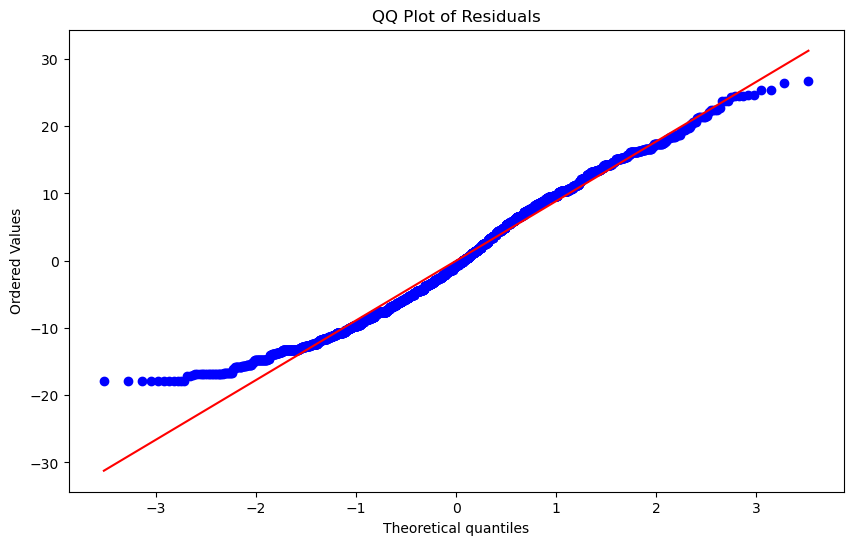

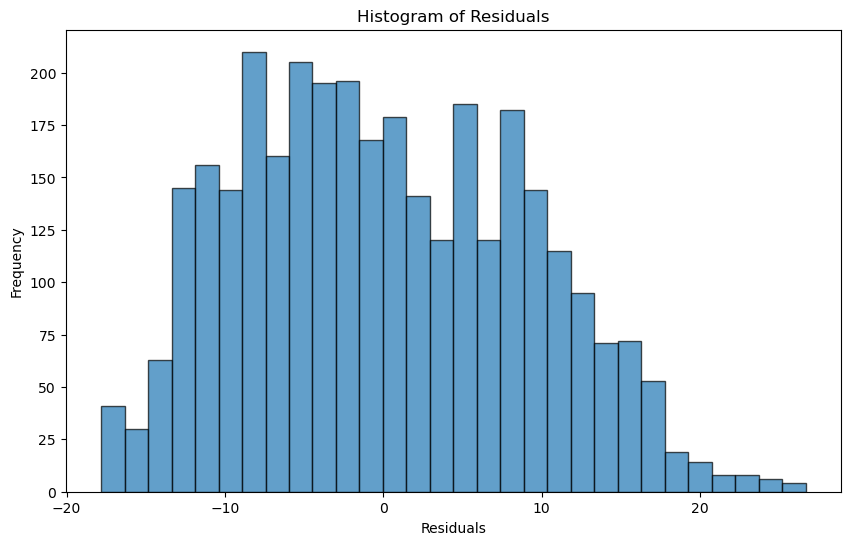

In [21]:
import scipy.stats as stats
residuals = y - y_pred
# QQ plot for residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
